In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

# files for hand in

# test files

In [234]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_00_52_53__31Out2017_.csv'

In [486]:
fn = !zenity --file-selection
fn = fn[0]
fn

'/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/results_10_51_07__31Out2017_handin_laser.csv'

In [584]:
fn = '/home/chiro/workspace/self_driving_car/term2/p1/CarND-Unscented-Kalman-Filter-Project/build/results.csv'

In [585]:
with open(fn, 'r') as f:
    reader = csv.reader(f)
    csv_data = [row for row in reader]

In [586]:
print('using lidar:', csv_data[0][2] == '1')
print('using radar:', csv_data[0][3] == '1')
print('noise a:', csv_data[0][0])
print('noise yawdd:', csv_data[0][1])

using lidar: True
using radar: True
noise a: 4.000000
noise yawdd: 0.197000


In [587]:
data = np.loadtxt(fn, delimiter=',', skiprows=1)

In [588]:
rmse = data[:,:4]
gt = data[:,4:4+4]
est = data[:,8:8+5]
P = data[:,13:-1]
nis = data[:,-2]
sensor = data[:,-1]

In [589]:
rmse_thesholds = [.09, .10, .40, .30]
titles = ['px', 'py', 'vx', 'vy']

last rmse for px is 0.090472
last rmse for py is 0.097654
last rmse for vx is 0.415193
last rmse for vy is 0.27138


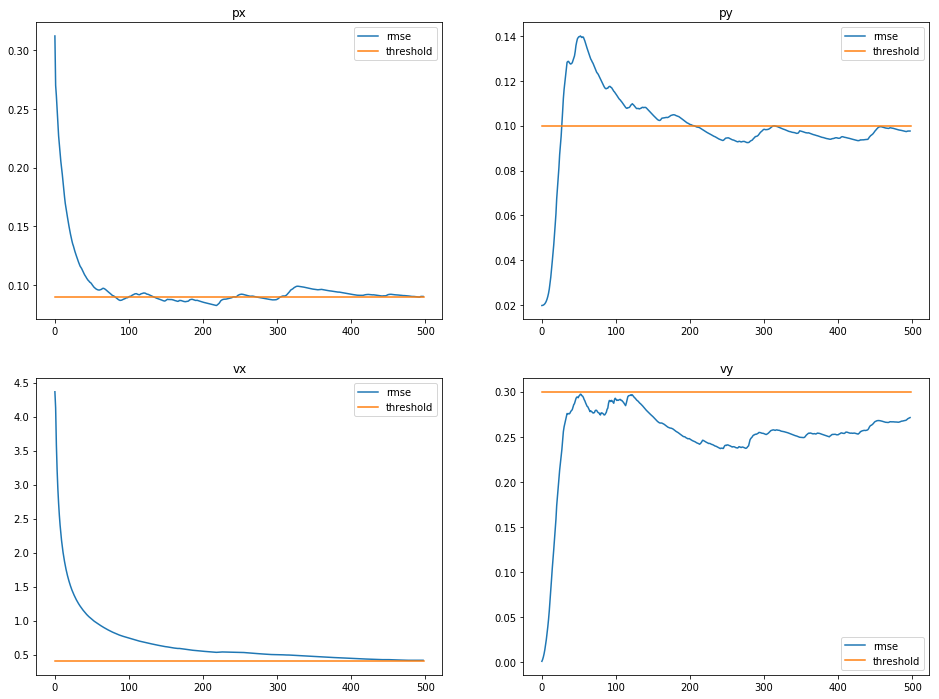

In [590]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(12)
axes = []
axes.extend(row1)
axes.extend(row2)

for ax, col_data, thresh, title in zip(axes, rmse.T, rmse_thesholds, titles):
    ax.plot(col_data, label='rmse')
    ax.plot([0, len(col_data)], [thresh, thresh], label='threshold')
    ax.set_title(title)
    ax.legend()
    print('last rmse for {} is {}'.format(title, col_data[-1]))

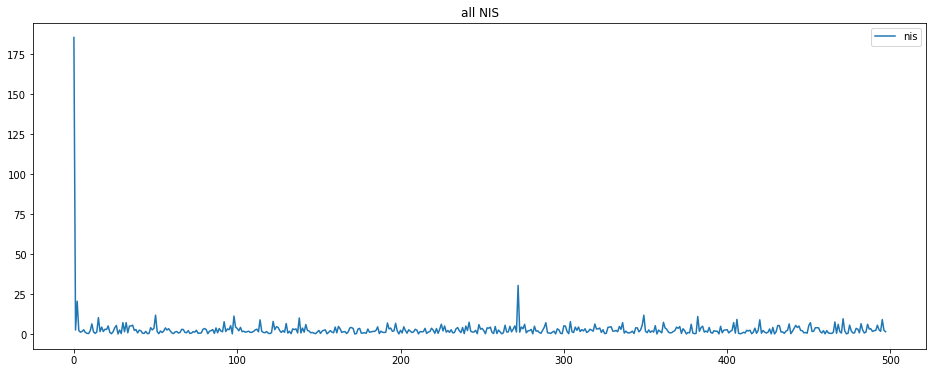

In [591]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_figwidth(16)
fig.set_figheight(6)


ax1.plot(nis, label='nis')
ax1.set_title('all NIS')
ax1.legend()

radar samples above threshold:  0.0364372469636
lidar samples above threshold:  0.0441767068273
total samples above threshold:  0.0403225806452


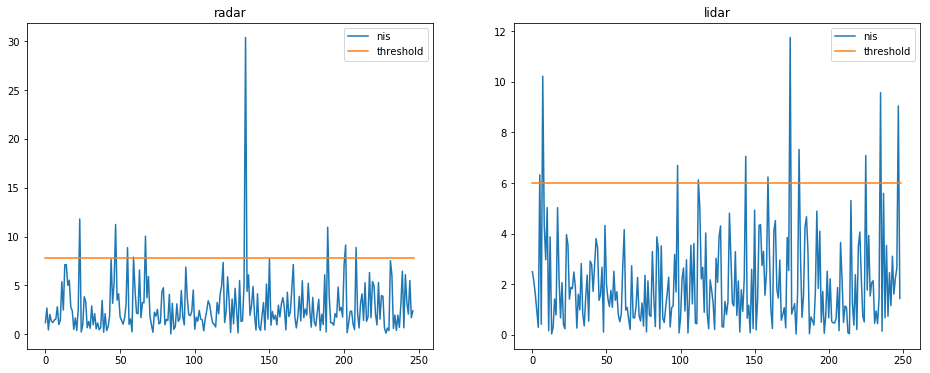

In [592]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(6)
samples_above = 0
total_samples = 0


if len(nis[sensor==1]) > 0:
    thresh = 7.815
#     ary2plot = nis[sensor==1]
    ary2plot = nis[sensor==1][2:]
    ax1.plot(ary2plot, label='nis')
    ax1.plot([0, len(ary2plot)], [thresh, thresh], label='threshold')
    ax1.set_title('radar')
    ax1.legend()
    print('radar samples above threshold: ', sum(ary2plot >= thresh) / len(ary2plot))
    samples_above += sum(ary2plot >= thresh)
    total_samples += len(ary2plot)

if len(nis[sensor==0]) > 0:
    thresh = 5.991
    ary2plot = nis[sensor==0]
#     ary2plot = nis[sensor==0][16:]
    ax2.plot(ary2plot, label='nis')
    ax2.plot([0, len(ary2plot)], [thresh, thresh], label='threshold')
    ax2.set_title('lidar')
    ax2.legend()
    print('lidar samples above threshold: ', sum(ary2plot >= thresh) / len(ary2plot))
    samples_above += sum(ary2plot >= thresh)
    total_samples += len(ary2plot)
    
print('total samples above threshold: ', samples_above / total_samples)

In [593]:
# maximum distance from origin
dist = [np.sqrt(px**2 + py**2) for px, py in zip(gt[:,0], gt[:,1])]
max(dist)

26.665607813516345

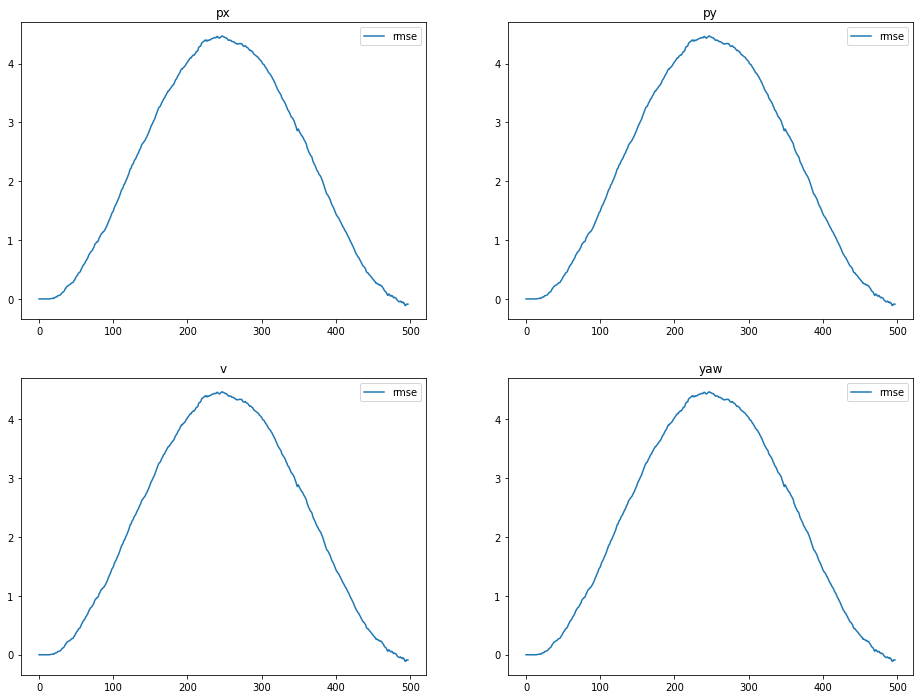

In [594]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(12)
axes = []
axes.extend(row1)
axes.extend(row2)

titles = ['px', 'py', 'v', 'yaw']
for ax, title in zip(axes,titles):
    ax.plot(est[:,i], label='rmse')
    ax.set_title(title)
    ax.legend()

In [595]:
std_a = 3
std_yawdd = math.pi / 16
t = 1  # seconds
radius = 16  # meters

print('95% of samples are within a yaw acceleration of {:.4f} rad/s.s'.format(2 * std_yawdd))
yawd_i = 0
yawd = yawd_i + std_yawdd * 2 * t
period = 2 * math.pi / yawd
v1 = 2 * math.pi * radius / period
print('after {} s, starting from {} rad/s, the yaw velocity would be {:.4f} rad/s'.format(t, yawd_i, yawd, period))
print('  and full circle would be completed in {} s'.format(period))
print('  and the tangential velocity for a radius of {} m would be {:.4f} m/s'.format(radius, v1))
print('')

yawd_i = yawd
yawd = yawd_i + std_yawdd * 2 * t
period = 2 * math.pi / yawd
v2 = 2 * math.pi * radius / period
print('after {} s, starting from {:.4f} rad/s, the yaw velocity would be {:.4f} rad/s.'.format(t, yawd_i, yawd, period))
print('  and full circle would be completed in {} s'.format(period))
print('  and the tangential velocity for a radius of {} m would be {:.4f} m/s'.format(radius, v2))
print('')

a = v2 - v1
print('the longitudinal acceleration for this change would be {:.4f} m/s.s'.format(a))

print('95% of samples are within a longitudinal acceleration of {} m/s.s'.format(2 * std_a))


95% of samples are within a yaw acceleration of 0.3927 rad/s.s
after 1 s, starting from 0 rad/s, the yaw velocity would be 0.3927 rad/s
  and full circle would be completed in 16.0 s
  and the tangential velocity for a radius of 16 m would be 6.2832 m/s

after 1 s, starting from 0.3927 rad/s, the yaw velocity would be 0.7854 rad/s.
  and full circle would be completed in 8.0 s
  and the tangential velocity for a radius of 16 m would be 12.5664 m/s

the longitudinal acceleration for this change would be 6.2832 m/s.s
95% of samples are within a longitudinal acceleration of 6 m/s.s


In [596]:
import math

In [597]:
math.pi / 16

0.19634954084936207

In [598]:
math.pi / 8

0.39269908169872414